In [1]:
import os
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Map ids to labels
ids2labels = {0: 'rock',
              1: 'scissors',
              2: 'paper'}

In [4]:
# Load the dataset and return images and labels
def load_dataset(directory, ids2labels):
    dataset = []
    for label_id, label in ids2labels.items():
        folder = os.path.join(directory, label)
        for image in os.listdir(folder):
            img = load_img(os.path.join(folder, image),
                        #    color_mode='grayscale',  # load in grayscale for dimensionality reduction
                           target_size=(100, 150),  # resize to 30 by 30
                           interpolation='bicubic',  # interpolation method for resizing
                           keep_aspect_ratio=True)  # keep aspect ratio
            img = img_to_array(img)
            img = img / 255  # normalize images to 0-1 range
            dataset.append((img, label_id))
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [5]:
X, y = load_dataset('drive/MyDrive/Kaggle/', ids2labels)

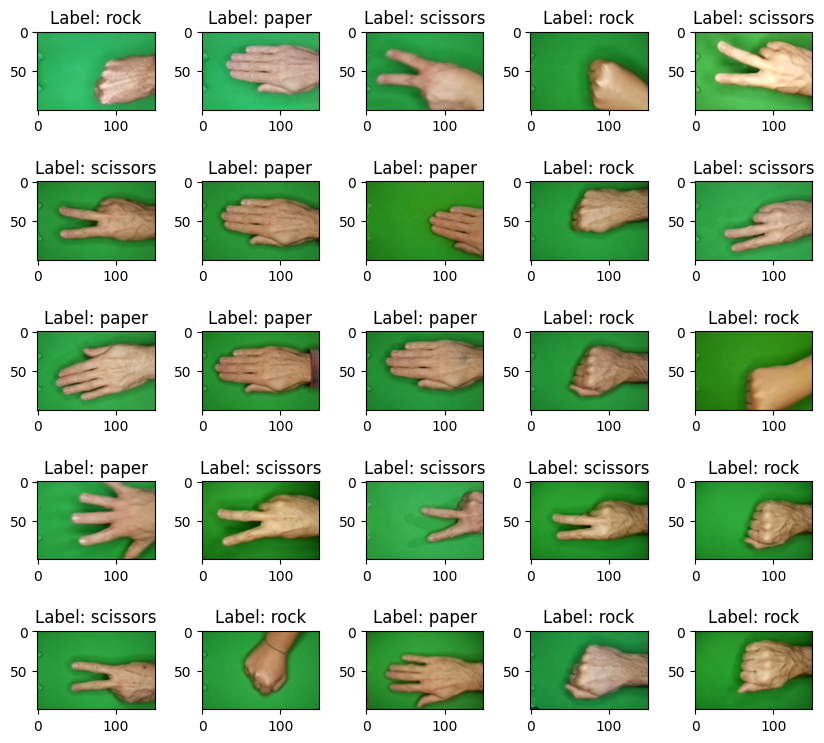

In [6]:
# Plot a few images
plt.figure(figsize = (10 , 9))
n = 0
for i in range(25):
    n += 1
    plt.subplot(5, 5, n)
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    plt.imshow(X[i])
    plt.title(f'Label: {ids2labels[y[i]]}')

In [7]:
# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train.shape

(1750, 100, 150, 3)

In [17]:
# Create a CNN model
num_of_classes = 3
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.25),  #random rotation between -90 and 90 degrees
  tf.keras.layers.Conv2D(32, 3, input_shape=(1750, 100, 150, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(units=num_of_classes)
])

In [18]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.build(input_shape=(1750, 100, 150, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (1750, 100, 150, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (1750, 100, 150, 3)       0         
 otation)                                                        
                                                                 
 conv2d_6 (Conv2D)           (1750, 98, 148, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (1750, 49, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (1750, 47, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (1750, 23, 36, 32)       

In [19]:
# Filepath to save best model
filepath= 'cnn_model_best.h5'
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=False,
                             save_freq='epoch')

In [20]:
# Train the model
history = model.fit(x=X_train, y=y_train,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    validation_batch_size=32,
                    epochs=50,
                    callbacks=[checkpoint])

Epoch 1/50
55/55 [==============================] - ETA: 0s - loss: 0.9762 - accuracy: 0.5240
Epoch 1: val_accuracy improved from -inf to 0.66438, saving model to cnn_model_best.h5
55/55 [==============================] - 40s 694ms/step - loss: 0.9762 - accuracy: 0.5240 - val_loss: 0.8696 - val_accuracy: 0.6644
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - ETA: 0s - loss: 0.6469 - accuracy: 0.7583
Epoch 2: val_accuracy improved from 0.66438 to 0.78767, saving model to cnn_model_best.h5
55/55 [==============================] - 37s 660ms/step - loss: 0.6469 - accuracy: 0.7583 - val_loss: 0.5155 - val_accuracy: 0.7877
Epoch 3/50
55/55 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.8594
Epoch 3: val_accuracy improved from 0.78767 to 0.92009, saving model to cnn_model_best.h5
55/55 [==============================] - 37s 663ms/step - loss: 0.4037 - accuracy: 0.8594 - val_loss: 0.2988 - val_accuracy: 0.9201
Epoch 4/50
55/55 [==============================] - ETA: 0s - loss: 0.2723 - accuracy: 0.9097
Epoch 4: val_accuracy did not improve from 0.92009
55/55 [==============================] - 36s 665ms/step - loss: 0.2723 - accuracy: 0.9097 - val_loss: 0.5667 - val_accuracy: 0.8105
Epoch 5/50
55/55 [==============================] - ETA: 0s - loss: 0.2143 - accuracy: 0.9280
Epoch 5:

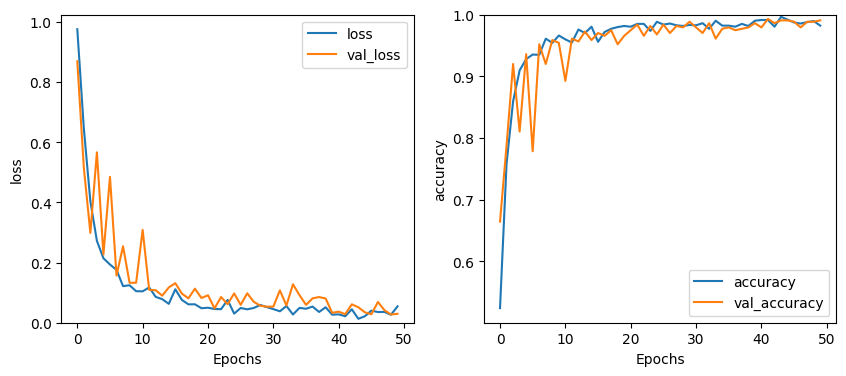

In [21]:
# Visualize accuracy and loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.ylim(0, None)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim(None, 1);

In [22]:
# Load the saved model
saved_model = tf.keras.models.load_model('cnn_model_best.h5')

In [23]:
# Print classification report
y_pred = saved_model.predict(X_test)
pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, pred, target_names=ids2labels.values()))

14/14 [==============================] - 3s 213ms/step
              precision    recall  f1-score   support

        rock       0.99      1.00      1.00       139
    scissors       1.00      0.99      0.99       164
       paper       0.99      0.99      0.99       135

    accuracy                           0.99       438
   macro avg       0.99      0.99      0.99       438
weighted avg       0.99      0.99      0.99       438



In [24]:
X_test[0].shape

(100, 150, 3)

In [25]:
# Rock Paper Scissors Game Class
class RockPaperScissors:
    def __init__(self):
        self.ids2labels = {0: 'rock',
                           1: 'scissors',
                           2: 'paper'}
        self.data_path = 'drive/MyDrive/Kaggle/'
        self.images = {0: os.path.join(self.data_path, self.ids2labels[0]),
                       1: os.path.join(self.data_path, self.ids2labels[1]),
                       2: os.path.join(self.data_path, self.ids2labels[2])}

        self.model = tf.keras.models.load_model('cnn_model_best.h5')

        self.image = None
        self.state = None

        self.points = [0]
        self.total_wins = 0

    def load_images(self):
        for label_id, label in self.ids2labels.items():
            folder = os.path.join(self.data_path, label)
            images = []

            for image in os.listdir(folder):
                img = load_img(os.path.join(folder, image),
                            #    color_mode='grayscale',  # load in grayscale for dimensionality reduction
                               target_size=(100, 150),  # resize to 30 by 30
                               interpolation='bicubic',  # interpolation method for resizing
                               keep_aspect_ratio=True)  # keep aspect ratio
                img = img_to_array(img)
                img = img / 255  # normalize images to 0-1 range
                images.append(img)

            random.shuffle(images)
            self.images[label_id] = images

        return None

    def select_image(self):
        self.state = random.choice(list(self.ids2labels.keys()))
        self.image = random.choice(self.images[self.state])
        return None

    def preprocess_image(self):
        image = self.image

        image = tf.image.random_flip_up_down(image)  # apply vertical flip randomly
        image = tf.image.random_flip_left_right(image)  # apply horizontal flip randomly
        image = tf.image.rot90(X_train[10], k=random.choice([0, -1, 0, 1]))  # apply rotation 90 or -90 degrees randomly

        # add noise randomly
        sample = GaussianNoise(0.05)
        image = sample(image, training=random.choice([0, 1]))

        return image

    def select_action(self, prediction):
        action4win_map = {0: 2,  # paper beats rock
                          1: 0,  # rock beats scissors
                          2: 1}  # scissors beats paper
        return action4win_map[prediction]

    def reward_action(self, action):
        reward = 0
        if action == 0 and self.state == 1:
            reward = 1  # rock beats scissors
        elif action == 0 and self.state == 2:
            reward = -1  # paper beats rock
        elif action == 1 and self.state == 0:
            reward = -1  # rock beats scissors
        elif action == 1 and self.state == 2:
            reward = 1  # scissors beats paper
        elif action == 2 and self.state == 0:
            reward = 1  # paper beats rock
        elif action == 2 and self.state == 1:
            reward = -1  # scissors beats paper
        return reward

    def play_round(self):
        self.select_image()
        preprocessed_image = self.preprocess_image()

        prediction = np.argmax(saved_model.predict(tf.expand_dims(preprocessed_image, axis=0)))

        action = self.select_action(prediction)
        reward = self.reward_action(action)
        print(f'state: {self.state}')
        print(f'prediction: {prediction}')
        print(f'action: {action}')

        self.points.append(self.points[-1] + reward)
        if reward == 1:
            self.total_wins += 1

        return None

    def plot_points(self):
        plt.figure(figsize=(5, 4))
        plt.plot(self.points)
        plt.title(f'Total wins: {self.total_wins}')
        plt.xlabel('Round')
        plt.ylabel('Points')
        return None

    def play(self, rounds):
        self.load_images()
        for i in range(rounds):
            self.play_round()
        self.plot_points()
        return None


1/1 [==============================] - 0s 101ms/step
state: 1
prediction: 2
action: 1
1/1 [==============================] - 0s 24ms/step
state: 0
prediction: 1
action: 0
1/1 [==============================] - 0s 25ms/step
state: 2
prediction: 2
action: 1
1/1 [==============================] - 0s 29ms/step
state: 0
prediction: 1
action: 0
1/1 [==============================] - 0s 25ms/step
state: 0
prediction: 1
action: 0
1/1 [==============================] - 0s 25ms/step
state: 1
prediction: 1
action: 0
1/1 [==============================] - 0s 25ms/step
state: 2
prediction: 1
action: 0
1/1 [==============================] - 0s 37ms/step
state: 0
prediction: 2
action: 1
1/1 [==============================] - 0s 43ms/step
state: 1
prediction: 1
action: 0
1/1 [==============================] - 0s 40ms/step
state: 0
prediction: 2
action: 1
1/1 [==============================] - 0s 38ms/step
state: 1
prediction: 1
action: 0
1/1 [==============================] - 0s 52ms/step
state: 0
pre

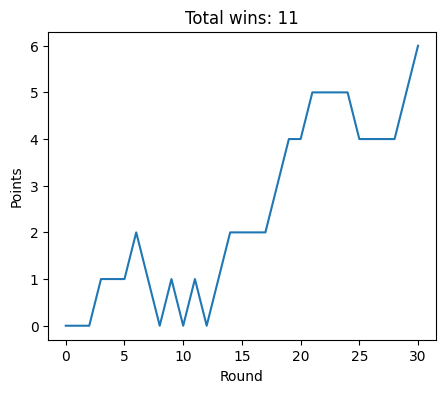

In [26]:
game = RockPaperScissors()
game.play(30)